In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [2]:
# Load data
data = pd.read_csv('/content/Raw Data CSV.csv')

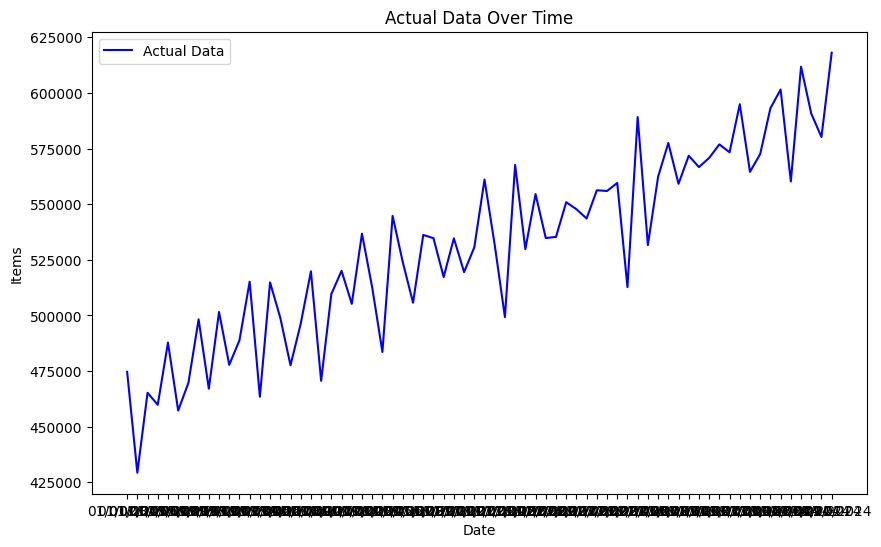

In [3]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['Month'], data['Items'], label='Actual Data', color='blue')  # Plot the actual data

# Add titles and labels
plt.title('Actual Data Over Time')
plt.xlabel('Date')
plt.ylabel('Items')

# Add a legend
plt.legend()

# Display the plot
plt.show()


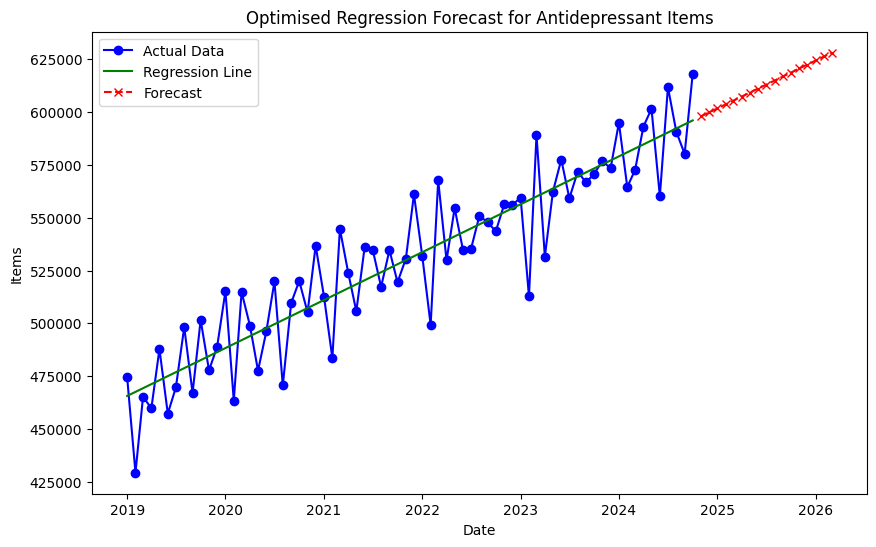

In [4]:
# Convert 'Month' to datetime and numerical format for regression
data['Month'] = pd.to_datetime(data['Month'], format='%d/%m/%Y')
data['Month_Num'] = (data['Month'] - data['Month'].min()).dt.days

# Train the linear regression model
X = data[['Month_Num']].values  # Independent variable
y = data['Items'].values        # Dependent variable
model = LinearRegression()
model.fit(X, y)

# Generate future dates for prediction
future_months = [data['Month'].max() + pd.DateOffset(months=i) for i in range(1, 18)]
future_month_nums = [(month - data['Month'].min()).days for month in future_months]
future_X = np.array(future_month_nums).reshape(-1, 1)

# Predict future values
future_items = model.predict(future_X)

# Combine actual and forecasted data for plotting
forecast_item_data = pd.DataFrame({
    'Month': future_months,
    'Items': future_items
})

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Items'], label='Actual Data', color='blue', marker='o')

# Plot the regression line for historical data
plt.plot(data['Month'], model.predict(X), label='Regression Line', color='green')

# Plot the forecasted data
plt.plot(forecast_item_data['Month'], forecast_item_data['Items'], label='Forecast', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Optimised Regression Forecast for Antidepressant Items')
plt.xlabel('Date')
plt.ylabel('Items')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [5]:
# See last 12m actual data
print(data.tail(12))

        Month   Items    Spend  Month_Num
58 2023-11-01  576846  1131420       1765
59 2023-12-01  573313  1142479       1795
60 2024-01-01  594894  1162661       1826
61 2024-02-01  564517  1144424       1857
62 2024-03-01  572526  1153170       1886
63 2024-04-01  593080  1076671       1917
64 2024-05-01  601485  1115157       1947
65 2024-06-01  560195  1104719       1978
66 2024-07-01  611731  1279373       2008
67 2024-08-01  590702  1172107       2039
68 2024-09-01  580179  1081615       2070
69 2024-10-01  618033  1081583       2100


In [6]:
# See forecast item data
print(forecast_item_data)

        Month          Items
0  2024-11-01  597924.987369
1  2024-12-01  599787.029789
2  2025-01-01  601711.140290
3  2025-02-01  603635.250791
4  2025-03-01  605373.157050
5  2025-04-01  607297.267551
6  2025-05-01  609159.309971
7  2025-06-01  611083.420472
8  2025-07-01  612945.462893
9  2025-08-01  614869.573394
10 2025-09-01  616793.683895
11 2025-10-01  618655.726315
12 2025-11-01  620579.836816
13 2025-12-01  622441.879236
14 2026-01-01  624365.989738
15 2026-02-01  626290.100239
16 2026-03-01  628028.006498


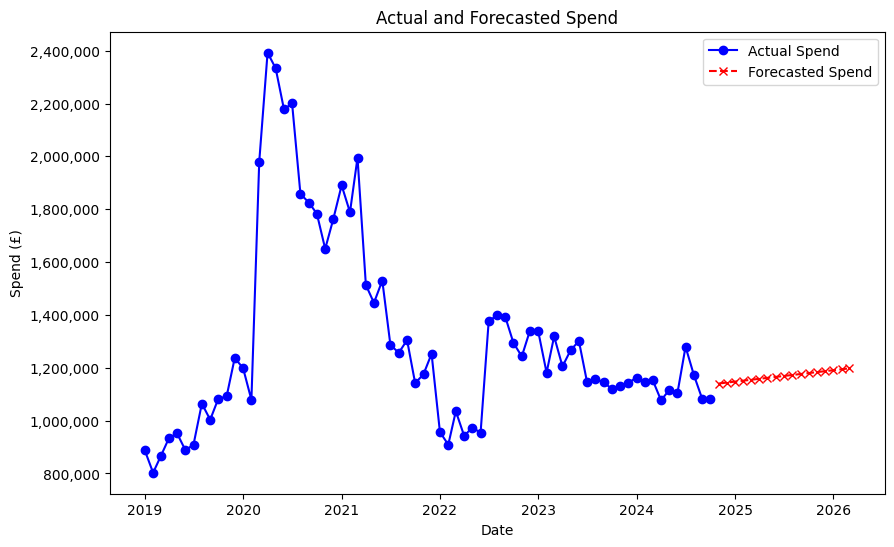

        Month  Forecasted Spend
0  2024-11-01         1,140,205
1  2024-12-01         1,143,756
2  2025-01-01         1,147,425
3  2025-02-01         1,151,094
4  2025-03-01         1,154,408
5  2025-04-01         1,158,077
6  2025-05-01         1,161,628
7  2025-06-01         1,165,297
8  2025-07-01         1,168,848
9  2025-08-01         1,172,517
10 2025-09-01         1,176,186
11 2025-10-01         1,179,737
12 2025-11-01         1,183,406
13 2025-12-01         1,186,957
14 2026-01-01         1,190,626
15 2026-02-01         1,194,295
16 2026-03-01         1,197,609


In [7]:
# Calculate the proportional growth pattern from Items
recent_items = data['Items'].tail(3).mean()
growth_factor = future_items / recent_items  # Growth pattern based on items regression

# Apply growth factor to actual spend
recent_spend = data['Spend'].tail(12).mean()
future_spend = growth_factor * recent_spend

# Create a DataFrame for forecasted spend
forecast_spend_data = pd.DataFrame({
    'Month': future_months[:len(future_spend)],  # Use the same number of months as forecasted spend
    'Forecasted Spend': future_spend
})

# Plots
plt.figure(figsize=(10, 6))

# Plot actual spend
plt.plot(data['Month'], data['Spend'], label='Actual Spend', color='blue', marker='o')

# Plot forecasted spend
plt.plot(forecast_spend_data['Month'], forecast_spend_data['Forecasted Spend'],
         label='Forecasted Spend', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual and Forecasted Spend')
plt.xlabel('Date')
plt.ylabel('Spend (£)')
plt.legend()

# Format axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

# Display forecasted spend data
pd.options.display.float_format = '{:,.0f}'.format
print(forecast_spend_data)


In [8]:
# Rename columns in forecast_spend_data to match the actual spend data
forecast_spend_data.rename(columns={'Forecasted Spend': 'Spend'}, inplace=True)

# Concatenate the two datasets
hybrid_data = pd.concat([data[['Month', 'Spend']], forecast_spend_data], ignore_index=True)

# Sort by 'Month' to ensure chronological order
hybrid_data.sort_values(by='Month', inplace=True)

# Reset the index
hybrid_data.reset_index(drop=True, inplace=True)

# Save the hybrid data to a CSV file
hybrid_data.to_csv('hybrid_data.csv', index=False)

print(hybrid_data)


        Month     Spend
0  2019-01-01   887,762
1  2019-02-01   802,616
2  2019-03-01   864,170
3  2019-04-01   933,912
4  2019-05-01   951,441
..        ...       ...
82 2025-11-01 1,183,406
83 2025-12-01 1,186,957
84 2026-01-01 1,190,626
85 2026-02-01 1,194,295
86 2026-03-01 1,197,609

[87 rows x 2 columns]


In [11]:
# Identify the current annual growth % forecast (this is only needed to provide context for the user in thinking about a modified %)
# Define the date ranges for the two periods
previous_period_start = pd.Timestamp('2024-04-01')
previous_period_end = pd.Timestamp('2025-03-31')
forecast_period_start = pd.Timestamp('2025-04-01')
forecast_period_end = pd.Timestamp('2026-03-31')

# Filter the hybrid data for the previous period (2024-04-01 to 2025-03-31)
previous_period_data = hybrid_data[
    (hybrid_data['Month'] >= previous_period_start) &
    (hybrid_data['Month'] <= previous_period_end)
]

# Filter the hybrid data for the forecast period (2025-04-01 to 2026-03-31)
forecast_period_data = hybrid_data[
    (hybrid_data['Month'] >= forecast_period_start) &
    (hybrid_data['Month'] <= forecast_period_end)
]

# Calculate the total spend for the previous period
previous_period_total = previous_period_data['Spend'].sum()

# Calculate the total spend for the forecast period
forecast_period_total = forecast_period_data['Spend'].sum()

# Calculate the predicted annual growth percentage
predicted_annual_growth_percentage = (
    (forecast_period_total - previous_period_total) / previous_period_total
) * 100

## Convert Predicted Annual Growth % into Predicted Monthly Growth %

# Convert predicted annual growth % to decimal
annual_growth_rate = predicted_annual_growth_percentage/100

# Calculate predicted monthly growth rate
predicted_monthly_growth_rate = (1 + annual_growth_rate)**(1/12) - 1

# Convert to percentage for display
predicted_monthly_growth_rate_percentage = predicted_monthly_growth_rate * 100

# Output the results
print(f"Predicted Annual Growth Percentage: {predicted_annual_growth_percentage:.2f}%")
print(f"Predicted Monthly Growth Rate: {predicted_monthly_growth_rate_percentage:.4f}%")

Predicted Annual Growth Percentage: 3.57%
Predicted Monthly Growth Rate: 0.2926%


In [56]:
## Enter Modified Annual Growth % and convert to monthly %

# Prompt the user to input the modified annual growth rate (in percentage)
modified_annual_growth_rate = float(input("Enter the modified annual growth rate (as a percentage): ")) / 100

# Calculate predicted monthly growth rate
modified_monthly_growth_rate = (1 + modified_annual_growth_rate)**(1/12) - 1

# Convert to percentage for display
modified_monthly_growth_rate_percentage = modified_monthly_growth_rate * 100

print(f"Modified Predicted Monthly Growth Rate: {modified_monthly_growth_rate_percentage:.4f}%")


Enter the modified annual growth rate (as a percentage): 0
Modified Predicted Monthly Growth Rate: 0.0000%


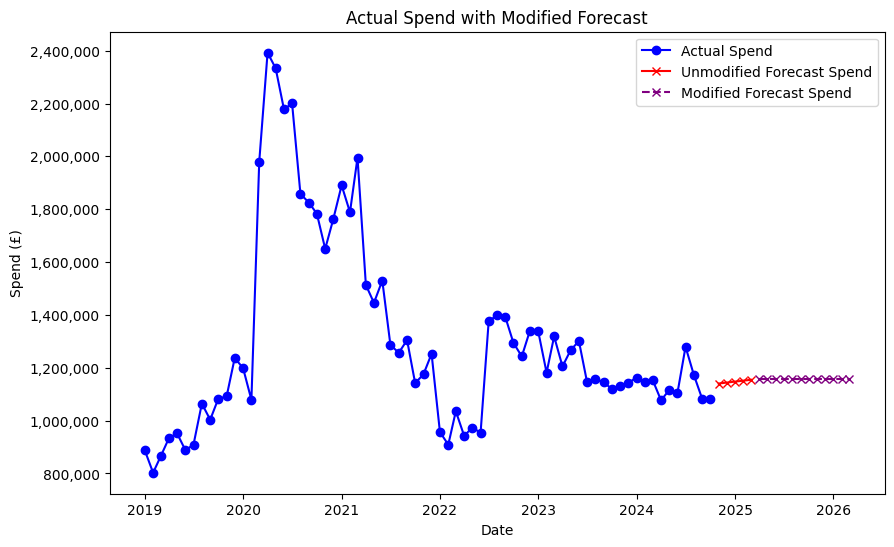

        Month  Modified Forecast Spend
0  2025-04-01                1,158,077
1  2025-05-01                1,158,077
2  2025-06-01                1,158,077
3  2025-07-01                1,158,077
4  2025-08-01                1,158,077
5  2025-09-01                1,158,077
6  2025-10-01                1,158,077
7  2025-11-01                1,158,077
8  2025-12-01                1,158,077
9  2026-01-01                1,158,077
10 2026-02-01                1,158,077
11 2026-03-01                1,158,077


In [57]:
# Define the monthly growth rate
monthly_growth_rate = modified_monthly_growth_rate_percentage/100

# Identify the spend value for the single month of 2025-04-01
spend_in_intervention_month = hybrid_data[hybrid_data['Month'] == pd.Timestamp('2025-04-01')]['Spend'].values[0]

# Generate the forecasted spend values for the next 12 months based on the average spend and monthly growth
modified_forecasted_spend_values = []
for i in range(12):
    # Calculate the forecasted spend for each month by applying the growth rate
    modified_forecasted_spend = spend_in_intervention_month * (1 + monthly_growth_rate) ** i
    modified_forecasted_spend_values.append(modified_forecasted_spend)

# Generate corresponding months for the forecast period (2025-04-01 to 2026-03-01)
forecast_months = pd.date_range(start='2025-04-01', periods=12, freq='MS')

# Create a DataFrame for the forecasted spend values
modified_forecast_spend_data = pd.DataFrame({
    'Month': forecast_months,
    'Modified Forecast Spend': modified_forecasted_spend_values
})

# Filter hybrid_data for plotting
filtered_hybrid_data = hybrid_data[
    (hybrid_data['Month'] >= pd.Timestamp('2024-11-01')) &
    (hybrid_data['Month'] <= pd.Timestamp('2025-03-01'))
]

# Plot the actual and forecasted spend values
plt.figure(figsize=(10, 6))

# Plot actual spend
plt.plot(data['Month'], data['Spend'], label='Actual Spend', color='blue', marker='o')

# Plot filtered hybrid spend
plt.plot(filtered_hybrid_data['Month'], filtered_hybrid_data['Spend'], label='Unmodified Forecast Spend', color='red', marker='x')

# Plot modified forecasted spend
plt.plot(modified_forecast_spend_data['Month'], modified_forecast_spend_data['Modified Forecast Spend'],
         label='Modified Forecast Spend', color='purple', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual Spend with Modified Forecast')
plt.xlabel('Date')
plt.ylabel('Spend (£)')
plt.legend()

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

# Output the modified forecasted spend data
print(modified_forecast_spend_data)
modified_forecast_spend_data.to_csv('modified_forecast_data.csv', index=False)


In [58]:
# Merge modified_forecast_spend_data into hybrid_data based on the Month column
hybrid_modified_data = pd.merge(
    hybrid_data,
    modified_forecast_spend_data,
    on='Month',
    how='left'  # Ensures all rows from hybrid_data are preserved
)

# Output the combined data
print(hybrid_modified_data)


        Month     Spend  Modified Forecast Spend
0  2019-01-01   887,762                      NaN
1  2019-02-01   802,616                      NaN
2  2019-03-01   864,170                      NaN
3  2019-04-01   933,912                      NaN
4  2019-05-01   951,441                      NaN
..        ...       ...                      ...
82 2025-11-01 1,183,406                1,158,077
83 2025-12-01 1,186,957                1,158,077
84 2026-01-01 1,190,626                1,158,077
85 2026-02-01 1,194,295                1,158,077
86 2026-03-01 1,197,609                1,158,077

[87 rows x 3 columns]


In [59]:
# Calculate 'Spend Difference' column only for the specified date range
hybrid_modified_data['Spend Difference'] = hybrid_modified_data.apply(
    lambda row: row['Modified Forecast Spend'] - row['Spend']
    if pd.Timestamp('2025-04-01') <= row['Month'] <= pd.Timestamp('2026-04-01') else None,
    axis=1
)

# Output the updated hybrid_modified_data
print(hybrid_modified_data)


        Month     Spend  Modified Forecast Spend  Spend Difference
0  2019-01-01   887,762                      NaN               NaN
1  2019-02-01   802,616                      NaN               NaN
2  2019-03-01   864,170                      NaN               NaN
3  2019-04-01   933,912                      NaN               NaN
4  2019-05-01   951,441                      NaN               NaN
..        ...       ...                      ...               ...
82 2025-11-01 1,183,406                1,158,077           -25,329
83 2025-12-01 1,186,957                1,158,077           -28,880
84 2026-01-01 1,190,626                1,158,077           -32,549
85 2026-02-01 1,194,295                1,158,077           -36,218
86 2026-03-01 1,197,609                1,158,077           -39,532

[87 rows x 4 columns]


In [60]:
# Sum the values in the 'Spend Difference' column
total_spend_difference = hybrid_modified_data['Spend Difference'].sum()

# Output the result
print(f"Total Spend Difference: {total_spend_difference:.0f}")


Total Spend Difference: -238258
